<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/Bitcoin_Forecasting_Logistic_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=6f81280f7f3b4877d61f068c3337e9060b9854f20517eb9d37d056df2dad7c99
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [4]:
def GetStockData(tickerSymbol, start, end):
  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start=start, end=end)

  #see your data
  return tickerDf[['Close']]

In [5]:
btc = GetStockData('BTC-USD', '2013-01-01', '2021-12-31')

In [16]:
# L =  Max Price
# t0 =  Mid point
#k =  Logistic Growth Rate

def logistic_model(x,L,t0,k):
    return L / (1. + np.exp(-k * (x - t0)))

In [29]:
def rmse(predictions, targets):
  return np.sqrt(np.mean((predictions-targets)**2))

In [37]:
x = np.arange(0,len(btc))
x1 = np.arange(0, 6000)
y = btc.values.reshape(-1)

In [76]:
L = 100000 # Max Price
t0 = len(x) # Mid point
#k = 0.02 # Logistic Growth Rate
minrmse = 0
params = []
cntr = 0
errdf = pd.DataFrame(columns=['L', 't0', 'k', 'rmse'])

for L in range(50000,500000,10000):
  for t0 in [3500]:
    for k in [0.002]:
      D = logistic_model(x,L,t0,k)
      err = rmse(D, y)
      #print('L = ', L, ', t0 = ', t0, ', k = ', k, ', RMSE = ', rmse(D, y))
      errdf.loc[cntr] = [L, t0, k, err]

      if cntr == 0:
        minrmse = err
      else:
        if err < minrmse:
          minrmse = err
          params = [L, t0, k]

      cntr = cntr + 1

print('Min RMSE Params: ', params)

Min RMSE Params:  [250000, 3500, 0.002]


Text(0.5, 1.0, 'Bitcoin Top')

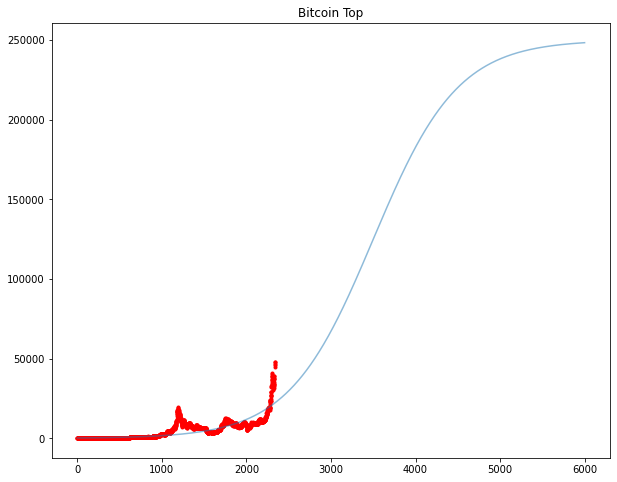

In [77]:
plt.figure(figsize = (10,8))
plt.plot(x,y,'r.')
D = logistic_model(x1,params[0], params[1], params[2])
plt.plot(x1,D, alpha=0.5)
plt.title('Bitcoin Top')

In [78]:
errdf.sort_values(by='rmse').head(10)

,L,t0,k,rmse
20,250000.0,3500.0,0.002,3924.761620
19,240000.0,3500.0,0.002,3936.185140
21,260000.0,3500.0,0.002,3936.218159
18,230000.0,3500.0,0.002,3970.291231
22,270000.0,3500.0,0.002,3970.356701
17,220000.0,3500.0,0.002,4026.503542
23,280000.0,3500.0,0.002,4026.600375
16,210000.0,3500.0,0.002,4103.913790
24,290000.0,3500.0,0.002,4104.040465
15,200000.0,3500.0,0.002,4201.350418


In [79]:
newerrdf = errdf.sort_values(by='rmse').reset_index(drop=True)

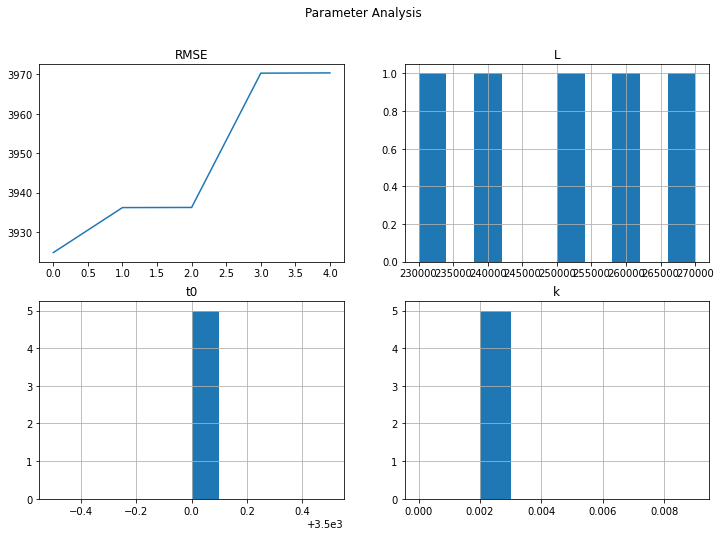

In [80]:
f1 = newerrdf['rmse']<4000

plt.subplots(2,2, figsize=(12,8))
plt.suptitle('Parameter Analysis')
plt.subplot(2,2,1)
plt.title('RMSE')
newerrdf.loc[f1,'rmse'].plot()
plt.subplot(2,2,2)
plt.title('L')
newerrdf.loc[f1,'L'].hist()
plt.subplot(2,2,3)
plt.title('t0')
newerrdf.loc[f1,'t0'].hist()
plt.subplot(2,2,4)
plt.title('k')
newerrdf.loc[f1,'k'].hist(bins=np.arange(0.0,0.01,0.001))

In [81]:
newerrdf.loc[f1,:].describe()

,L,t0,k,rmse
count,5.000000,5.0,5.000,5.000000
mean,250000.000000,3500.0,0.002,3947.562570
std,15811.388301,0.0,0.000,21.296651
min,230000.000000,3500.0,0.002,3924.761620
25%,240000.000000,3500.0,0.002,3936.185140
50%,250000.000000,3500.0,0.002,3936.218159
75%,260000.000000,3500.0,0.002,3970.291231
max,270000.000000,3500.0,0.002,3970.356701
